In [46]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
import requests
from io import BytesIO
from IPython.display import display

C:\Users\rg413939\AppData\Roaming\Python\Python310\site-packages\urllib3\connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'nanonets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


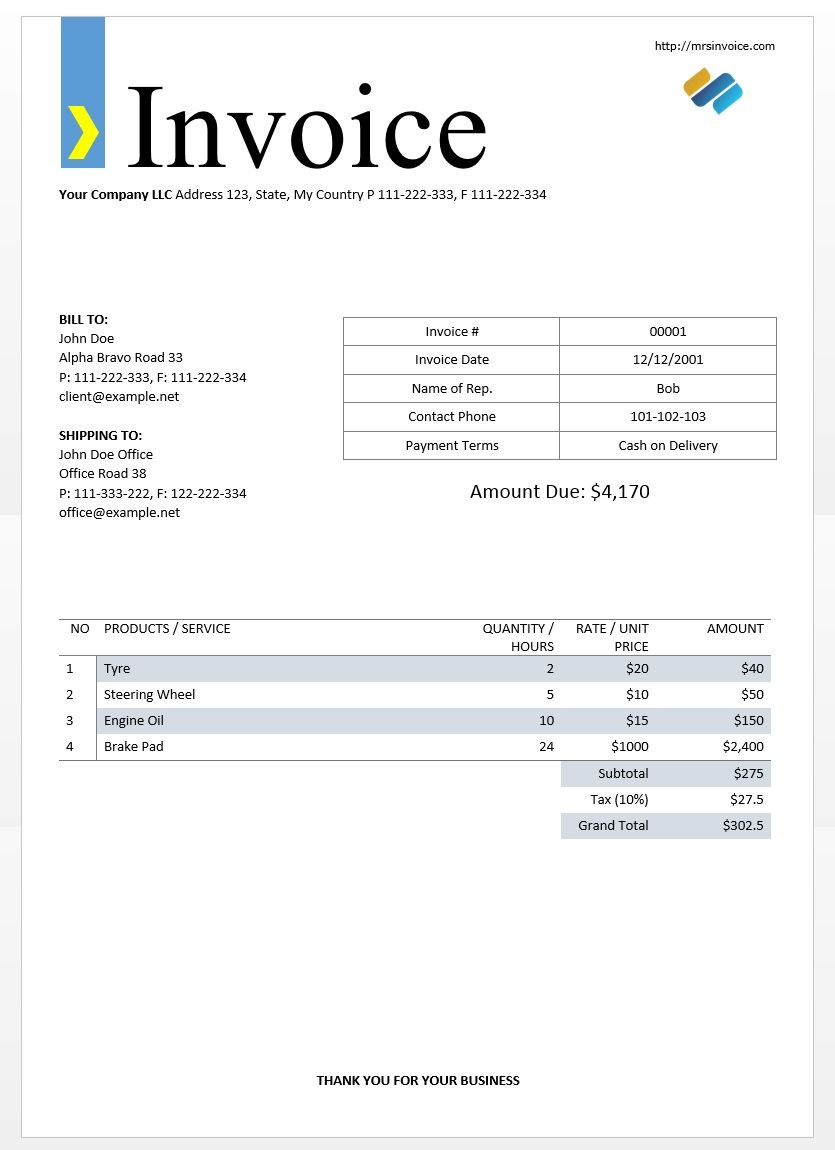

In [47]:
full_url = 'https://nanonets.com/blog/content/images/2019/12/invoice-sample.jpg'
response = requests.get(full_url, verify = False)
im = Image.open(BytesIO(response.content)) #'Use when image is from https request, else can omit BytesIO'
display(im)

In [10]:
print(im.format, im.size, im.mode)

JPEG (835, 1150) RGB


In [15]:
import os, sys
for infile in sys.argv[1:]:
    f, e = os.path.splitext(infile)
    outfile = f + ".jpg"
    if infile != outfile:
        try:
            with Image.open(BytesIO(response.content)) as im:
                im.save(outfile)
        except OSError:
            print("cannot convert", infile)

cannot convert --f=c:\Users\rg413939\AppData\Roaming\jupyter\runtime\kernel-v2-14872hjErwcJqKbn1.json


In [16]:
import os, sys
from PIL import Image

size = (128, 128)

for infile in sys.argv[1:]:
    outfile = os.path.splitext(infile)[0] + ".thumbnail"
    if infile != outfile:
        try:
            with Image.open(BytesIO(response.content)) as im:
                im.thumbnail(size)
                im.save(outfile, "JPEG")
        except OSError:
            print("cannot create thumbnail for", infile)

cannot create thumbnail for --f=c:\Users\rg413939\AppData\Roaming\jupyter\runtime\kernel-v2-14872hjErwcJqKbn1.json


In [17]:
for infile in sys.argv[1:]:
    try:
        with Image.open(BytesIO(response.content)) as im:
            print(infile, im.format, f"{im.size}x{im.mode}")
    except OSError:
        pass

--f=c:\Users\rg413939\AppData\Roaming\jupyter\runtime\kernel-v2-14872hjErwcJqKbn1.json JPEG (835, 1150)xRGB


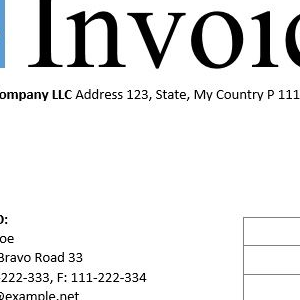

In [48]:
#Cropping Box
box = (100, 100, 400, 400) #box = (left, upper, right, lower)
region = im.crop(box)
display(region)

In [24]:
#Pasting Box
region = region.transpose(Image.Transpose.ROTATE_180)
im.paste(region, box)

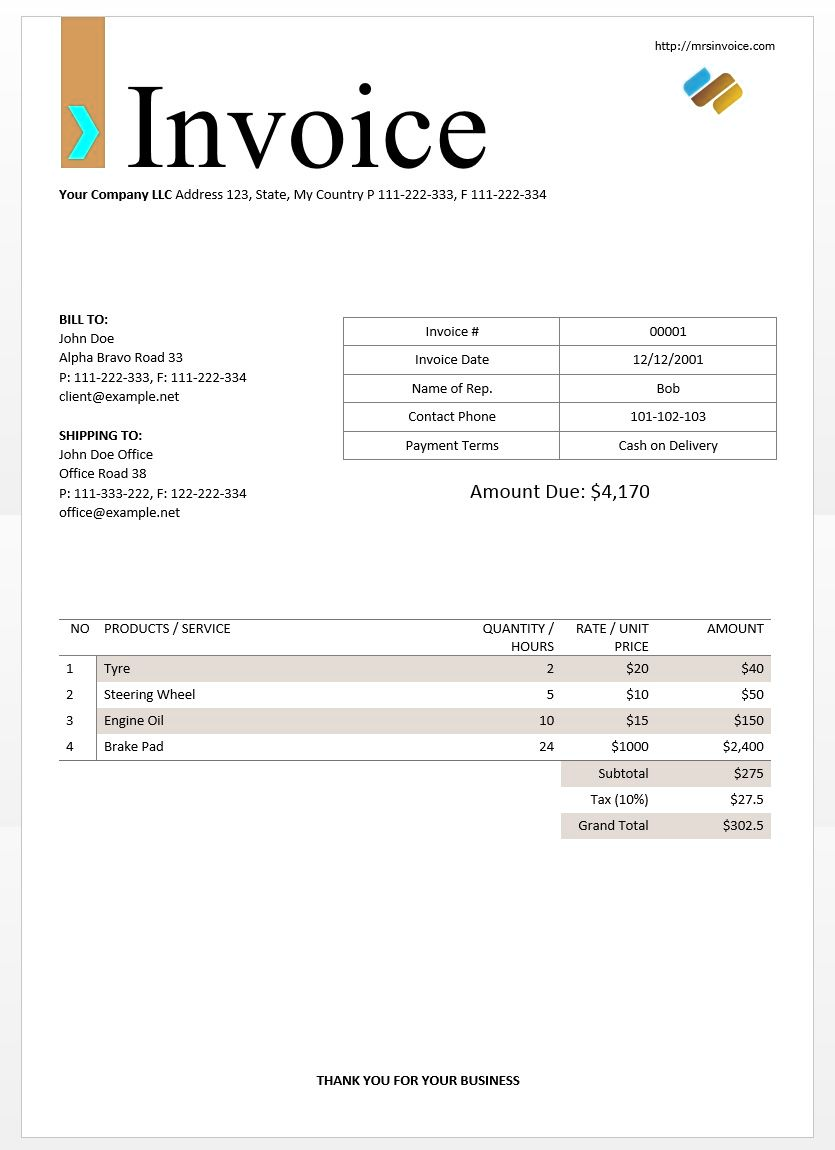

In [49]:
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))
display(im)

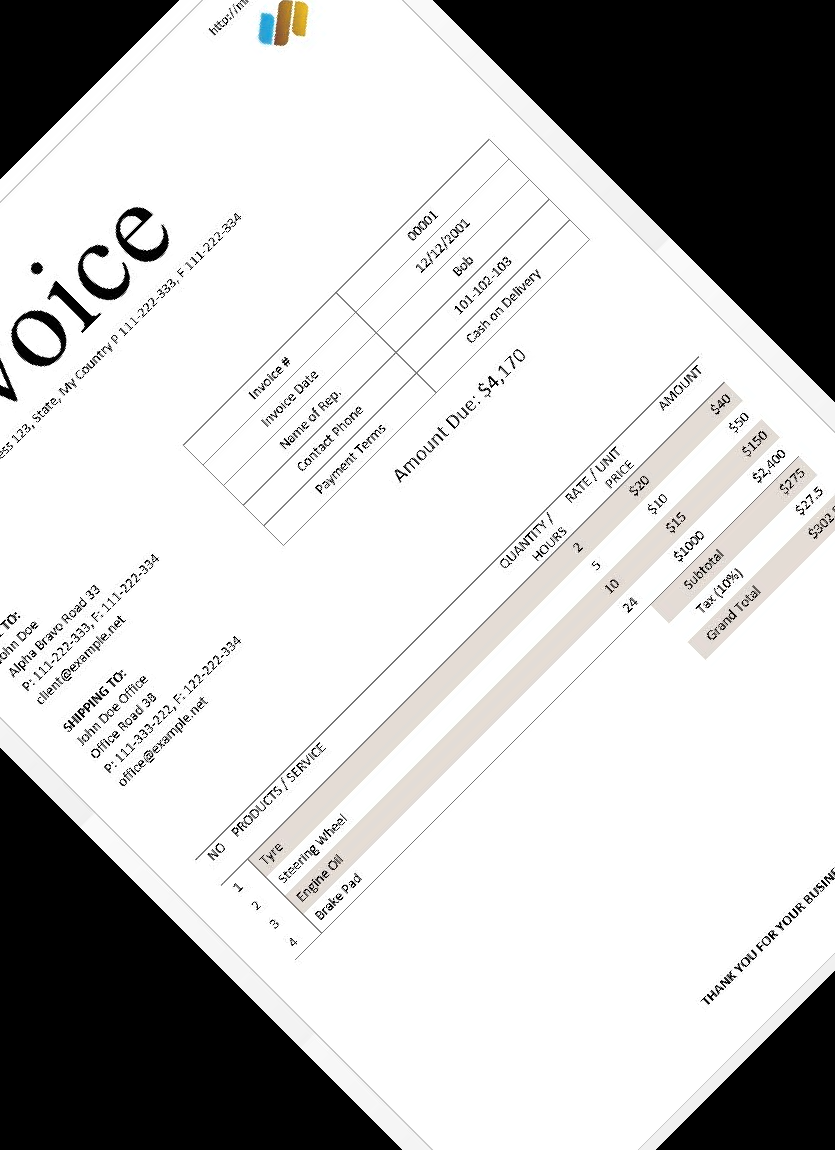

In [50]:
out = im.resize((128, 128))
out = im.rotate(45) # degrees counter-clockwise
display(out)

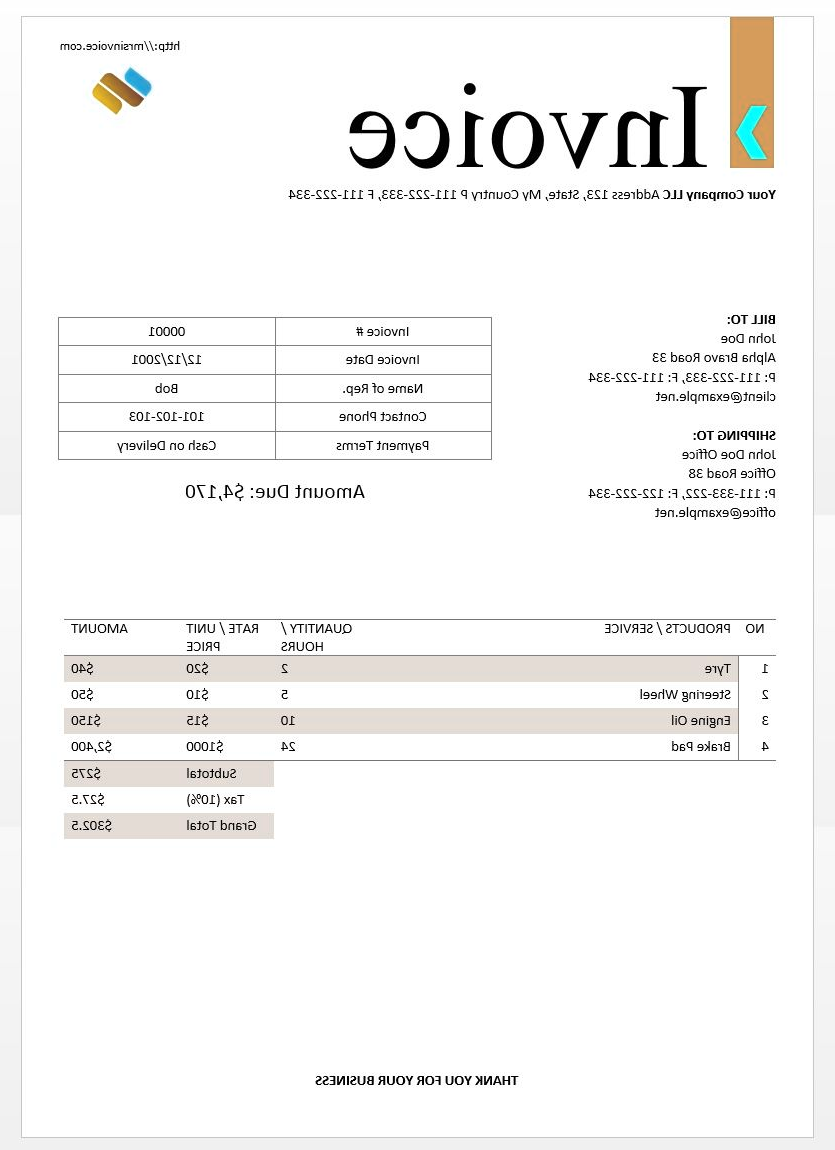

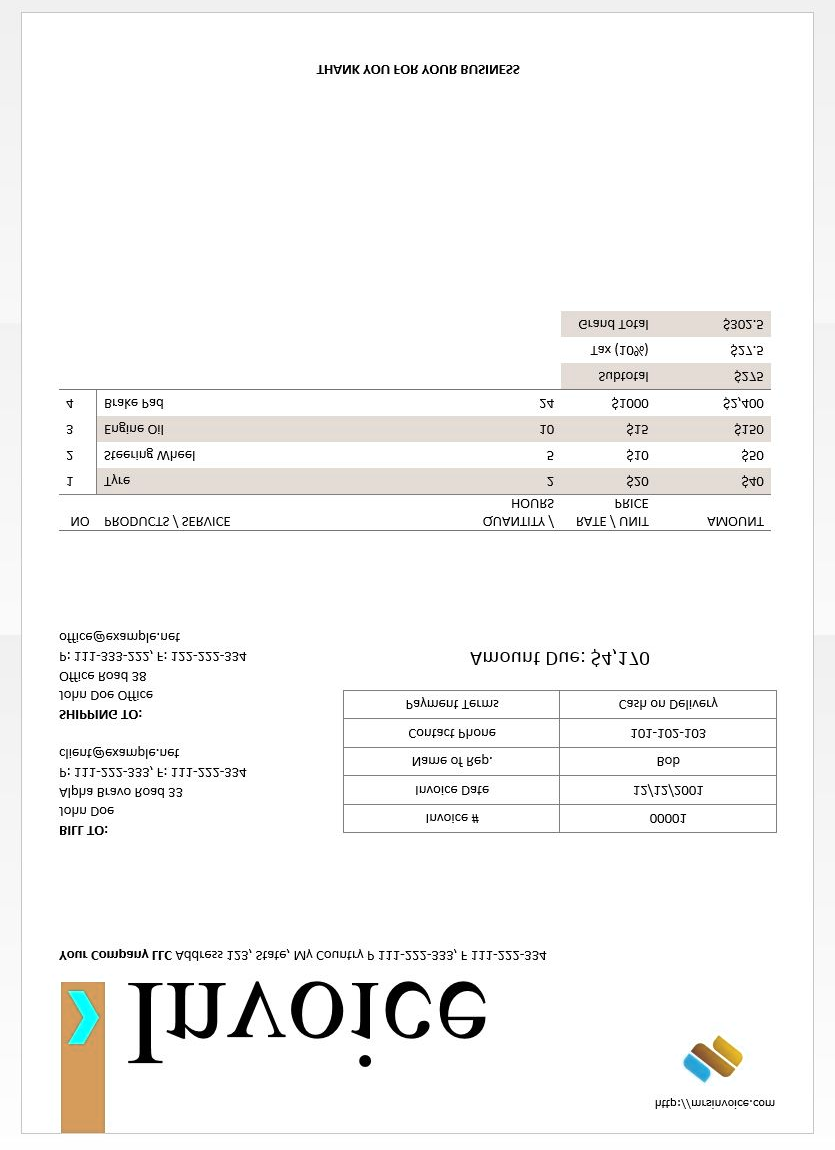

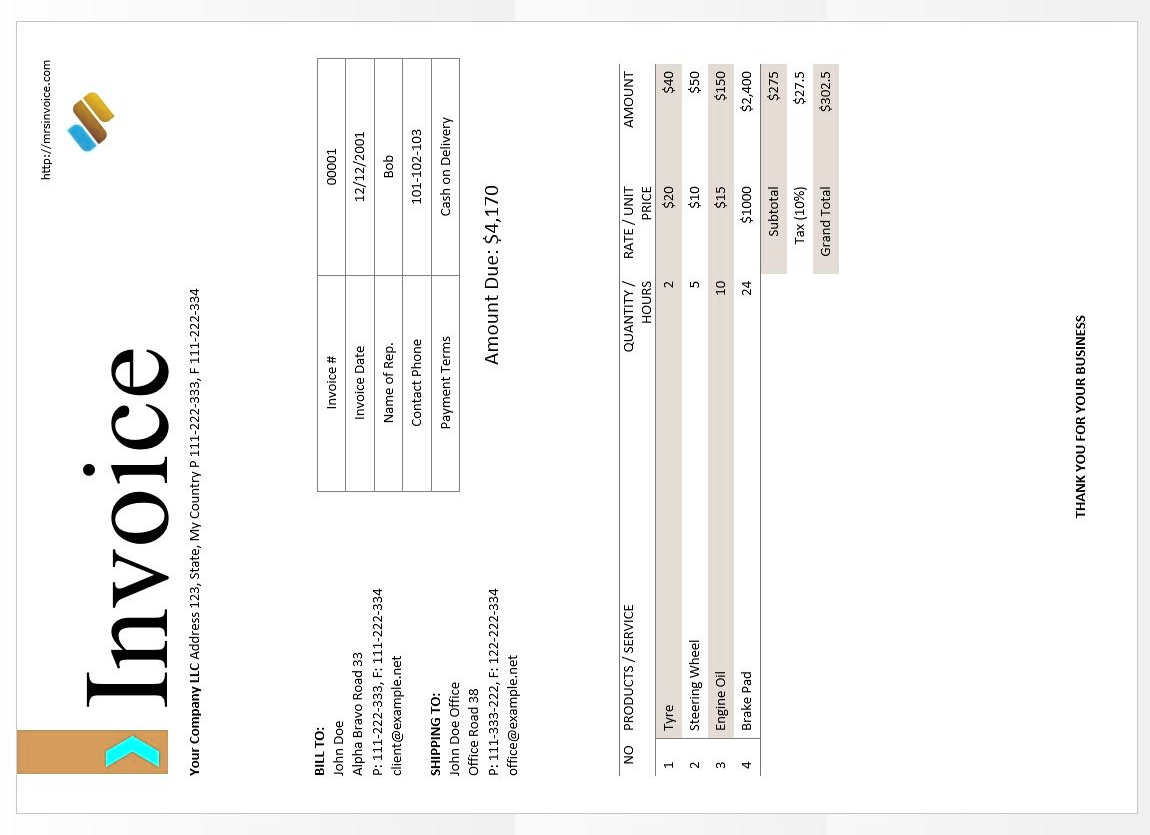

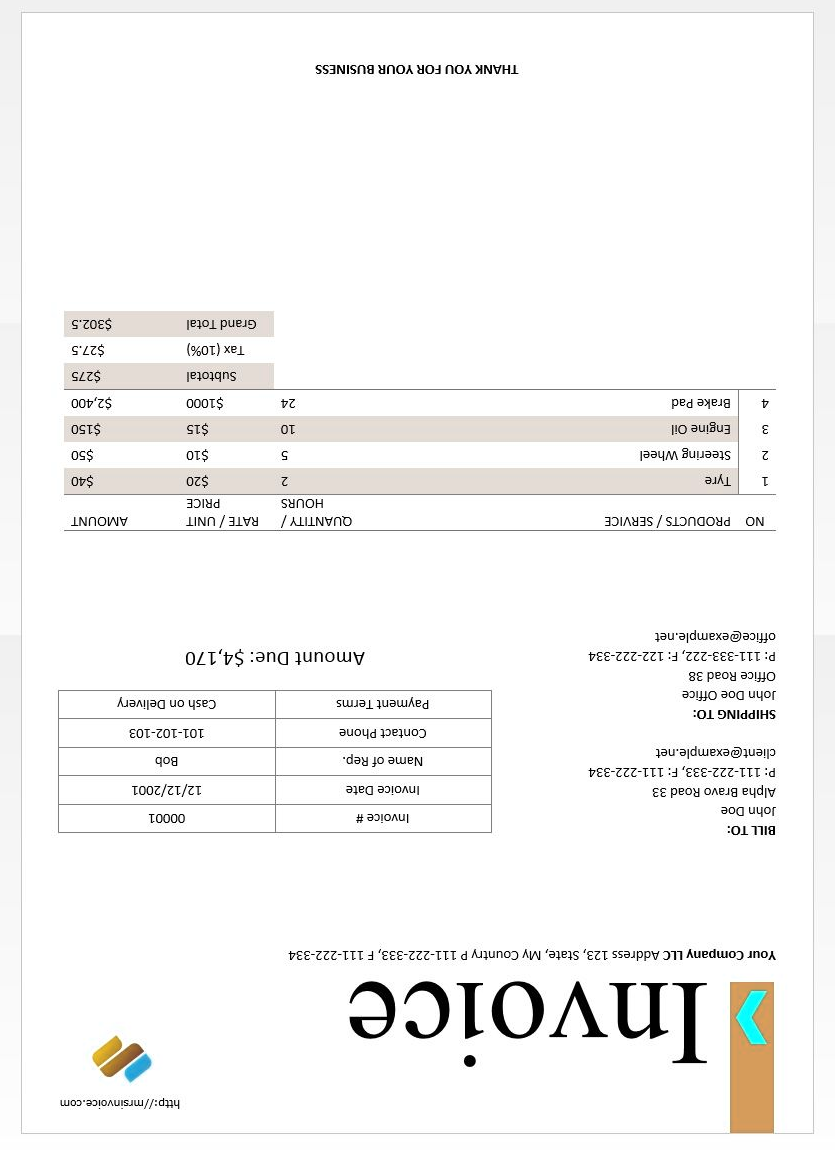

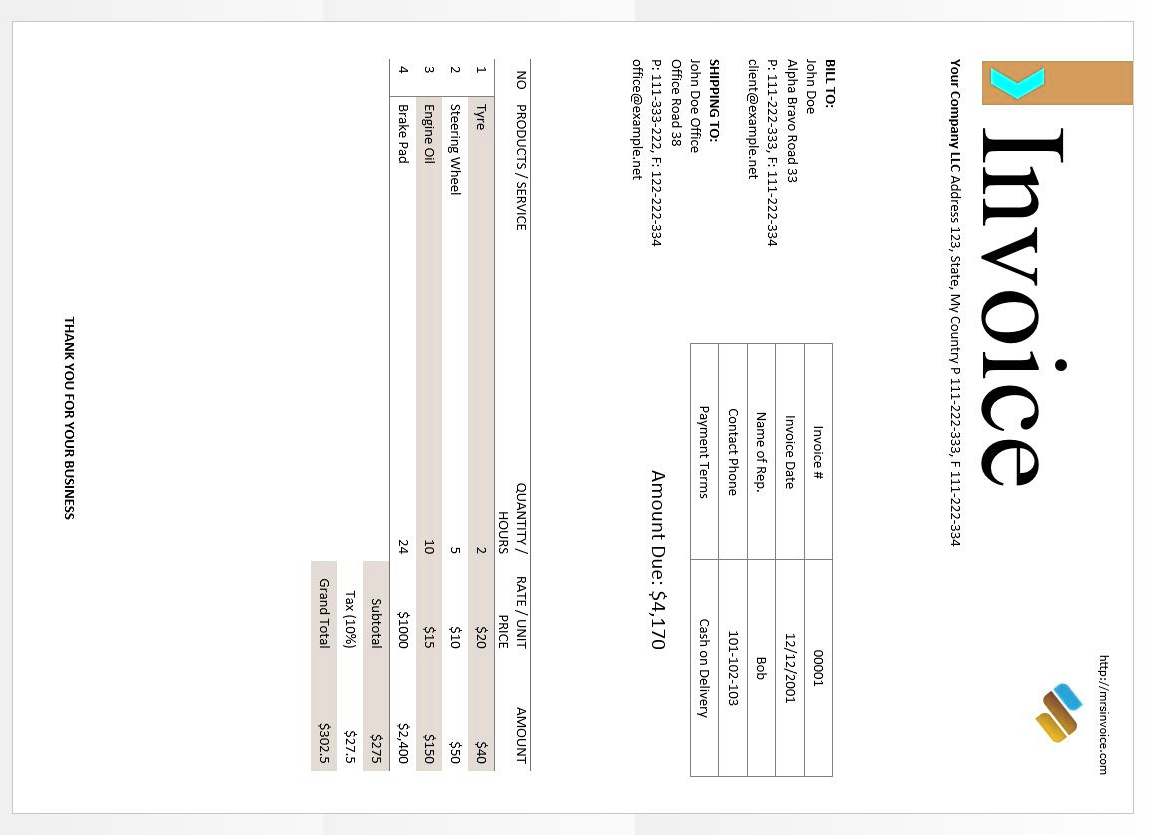

In [51]:
out = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
display(out)
out = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
display(out)
out = im.transpose(Image.Transpose.ROTATE_90)
display(out)
out = im.transpose(Image.Transpose.ROTATE_180)
display(out)
out = im.transpose(Image.Transpose.ROTATE_270)
display(out)

In [52]:
from PIL import Image, ImageOps
size = (100, 150)
with Image.open("Tests/images/hopper.webp") as im:
    ImageOps.contain(im, size).save("imageops_contain.webp")
    ImageOps.cover(im, size).save("imageops_cover.webp")
    ImageOps.fit(im, size).save("imageops_fit.webp")
    ImageOps.pad(im, size, color="#f00").save("imageops_pad.webp")

    # thumbnail() can also be used,
    # but will modify the image object in place
    im.thumbnail(size)
    im.save("image_thumbnail.webp")

PermissionError: [Errno 13] Permission denied: 'C:\\Program Files\\Microsoft VS Code\\imageops_contain.webp'

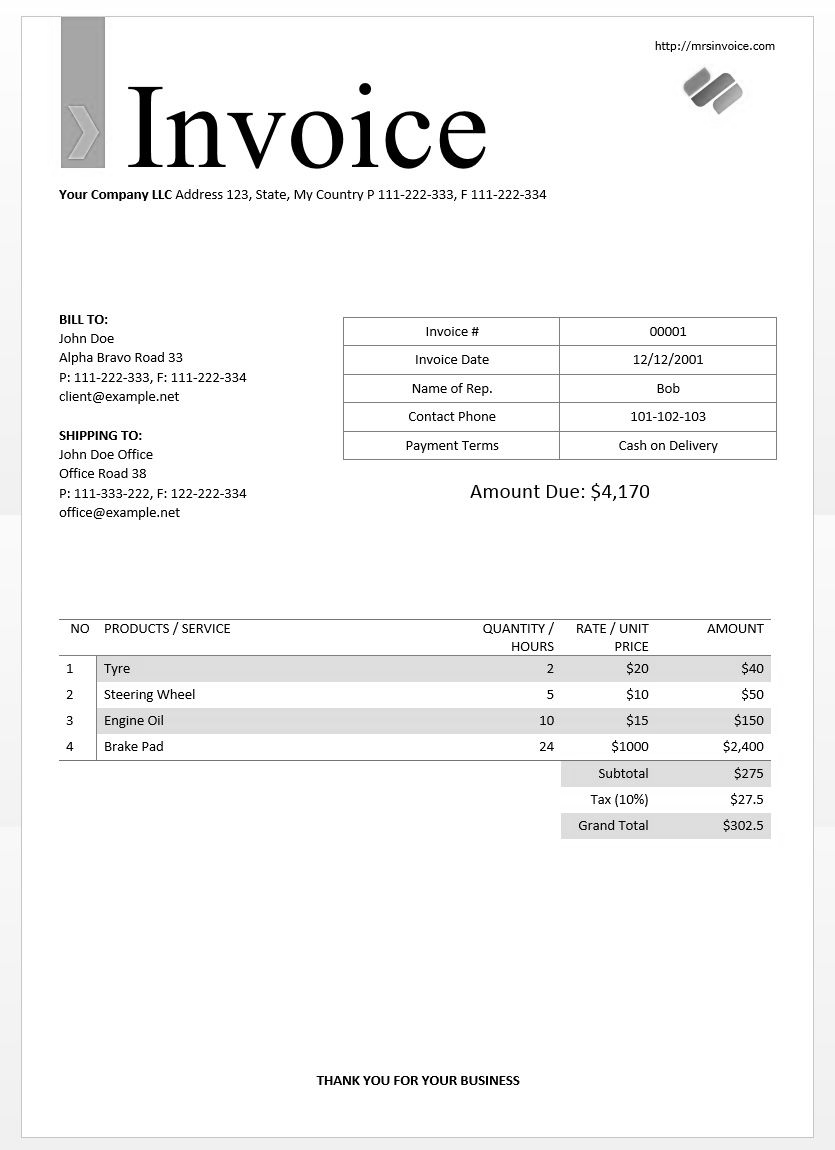

In [54]:
from PIL import Image

with im:
    im = im.convert("L")
display(im)

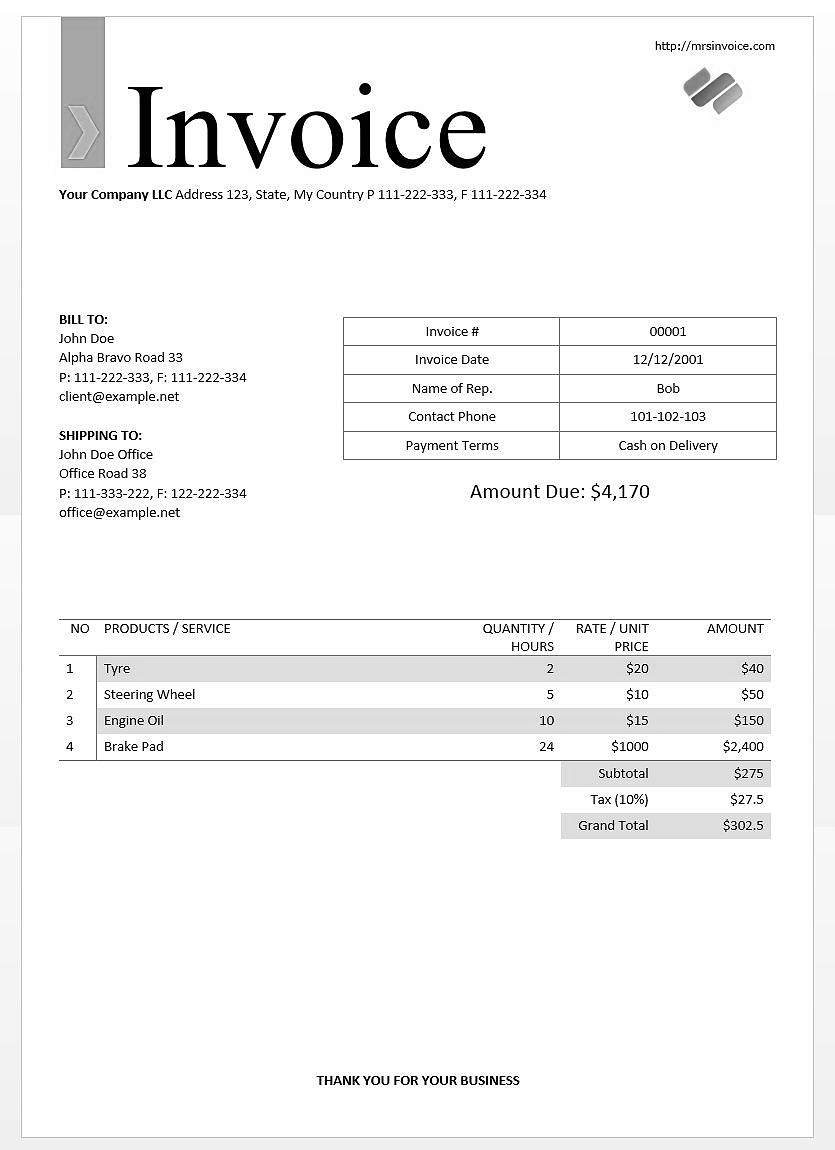

In [58]:
from PIL import ImageFilter
out = im.filter(ImageFilter.DETAIL)
display(out)
'''BLUR

CONTOUR

DETAIL

EDGE_ENHANCE

EDGE_ENHANCE_MORE

EMBOSS

FIND_EDGES

SHARPEN

SMOOTH

SMOOTH_MORE'''



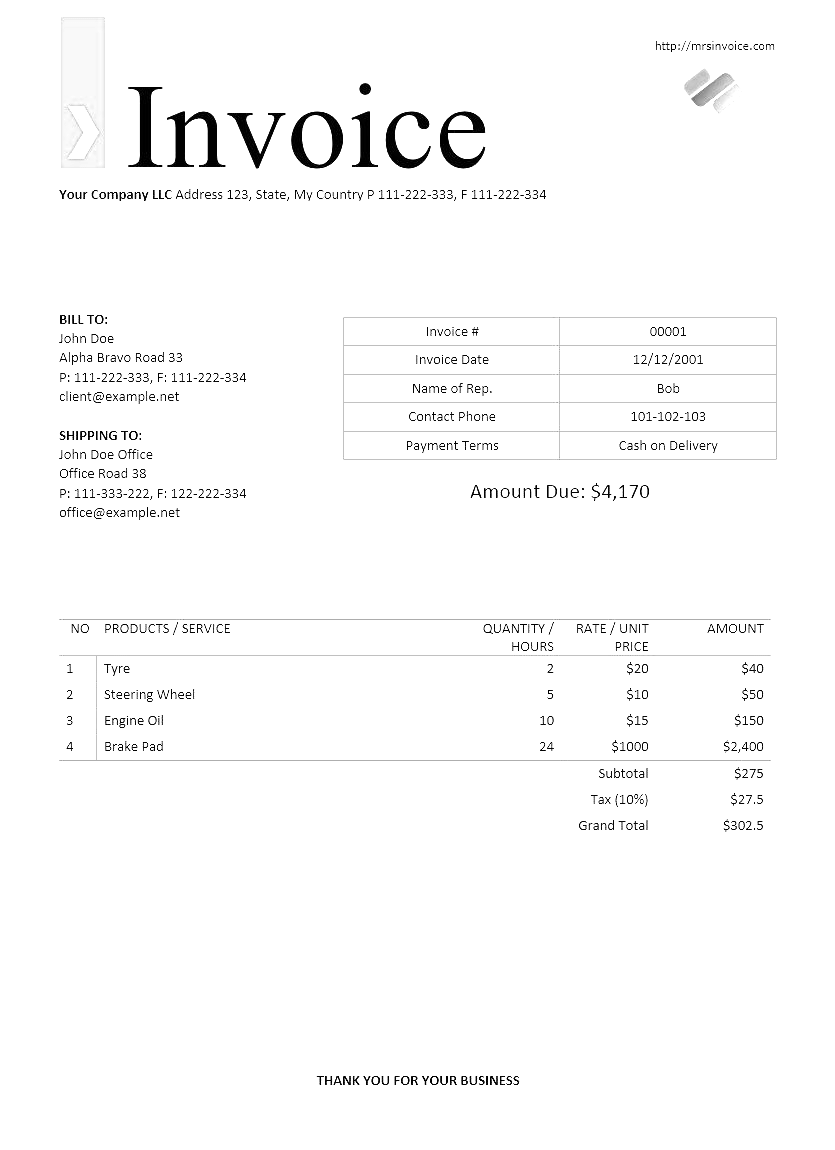

In [68]:
#Image Contrast
out = im.point(lambda i: i * 1.5)
display(out)

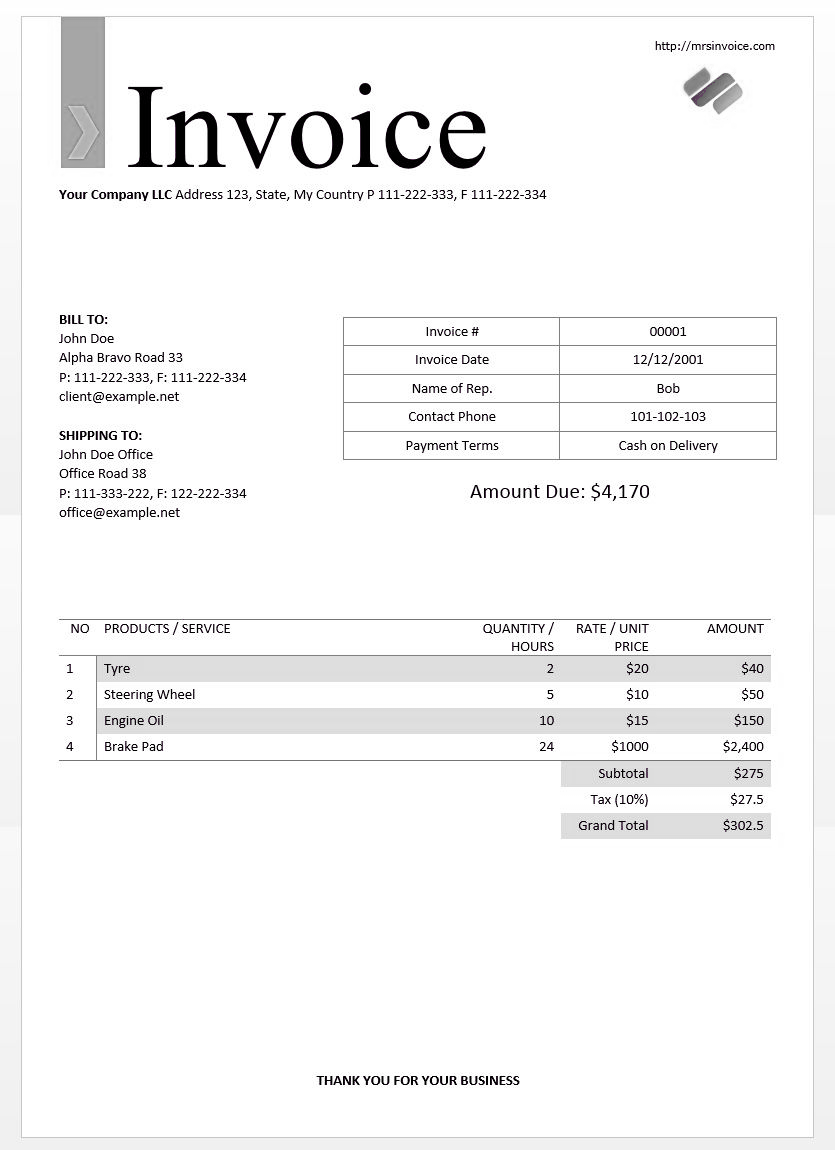

In [73]:
from PIL import Image
if im.mode != 'RGB':
    im = im.convert('RGB')

source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)

# Display or save the result
display(im) # To display the image

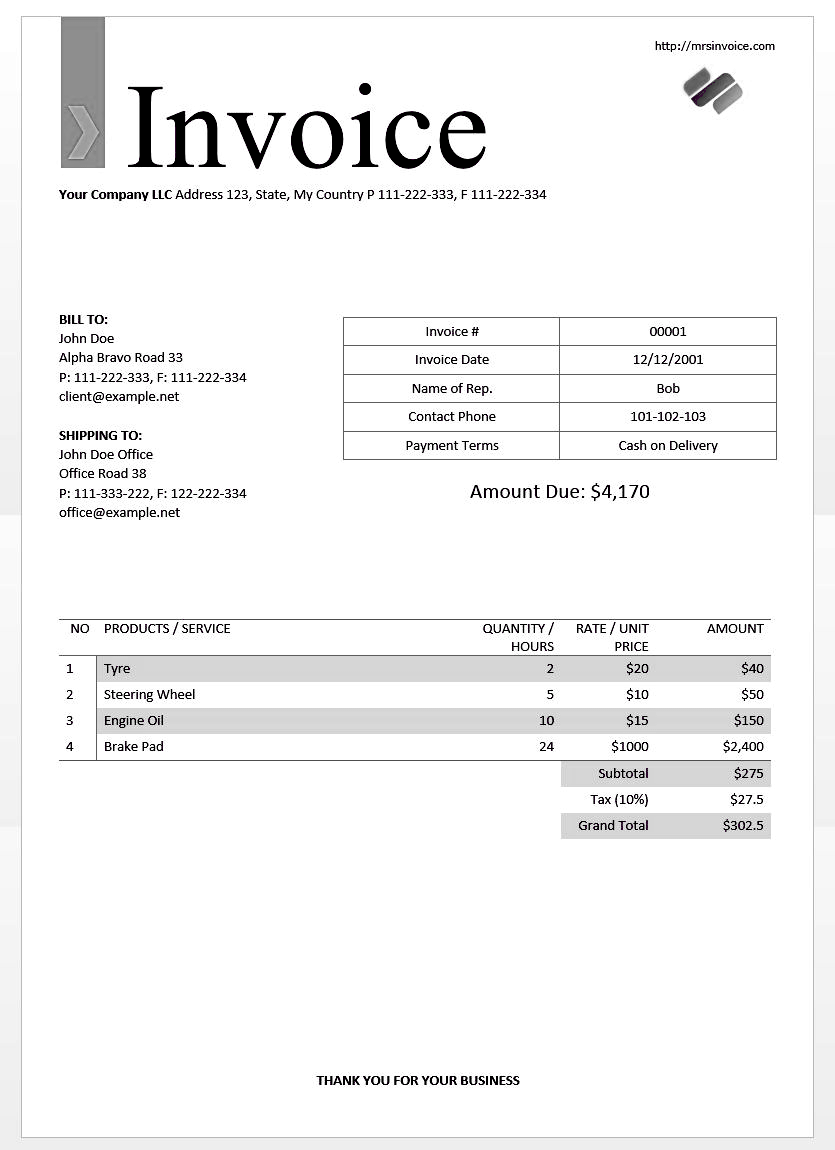

In [75]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
display(enh.enhance(1.3))

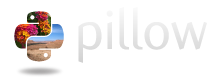

In [77]:
from PIL import Image
from urllib.request import urlopen
url = "https://python-pillow.org/assets/images/pillow-logo.png"
img = Image.open(urlopen(url))
display(img)